# K-Means: Python vs NumPy vs CUDA
#### Author: Diogo Silva

This notebook contains an analysis of the results from executing the different implementations (CUDA, NumPy, Python) of the K-Means algorithm.

In [1]:
# necessary imports
%pylab inline
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# locations of the results
results_filename="/home/chiroptera/workspace/QCThesis/CUDA/tests/test1v2/results.csv" #local
#results_filename="https://raw.githubusercontent.com/Chiroptera/QCThesis/master/CUDA/tests/test1v2/results.csv" #git repo

In [3]:
results = pd.read_csv(results_filename)

In [4]:
print "Structure of the results"
results.head()

Structure of the results


,type,N,D,NATC,K,iters,R,time
0,cuda,1000,2,20,5,3,0,0.006028
1,cuda,1000,2,20,5,3,1,0.005596
2,cuda,1000,2,20,5,3,2,0.005583
3,cuda,1000,2,20,5,3,3,0.005618
4,cuda,1000,2,20,5,3,4,0.005639


Some of the parameters were don't change in these results, so we can delete them (natural number of clusters, dimensionality and number of iterations). Furthermore, We can delete the rounds column because it becomes useless after averaging the times.

In [5]:
results.drop(['R','NATC','D','iters'], axis=1, inplace=True)

results.head()

,type,N,K,time
0,cuda,1000,5,0.006028
1,cuda,1000,5,0.005596
2,cuda,1000,5,0.005583
3,cuda,1000,5,0.005618
4,cuda,1000,5,0.005639


In [6]:
rounds = results.groupby(['type','N','K'],as_index = True)
results_mean = rounds.mean()
rounds.describe()

time
type   N      K                    
cuda   1000   5   count   10.000000
                  mean     0.005652
                  std      0.000133
                  min      0.005583
                  25%      0.005606
                  50%      0.005611
                  75%      0.005620
                  max      0.006028
              10  count   10.000000
                  mean     0.005925
                  std      0.000019
                  min      0.005905
                  25%      0.005908
                  50%      0.005921
                  75%      0.005939
                  max      0.005961
              20  count   10.000000
                  mean     0.006490
                  std      0.000032
                  min      0.006453
                  25%      0.006468
                  50%      0.006480
                  75%      0.006505
                  max      0.006554
              30  count   10.000000
                  mean     0.007084
                  std      0.000214
                  min      0.006994
                  25%      0.007004
                  50%      0.007013
...                             ...
python 100000 50  std      0.245966
                  min     74.615616
                  25%     74.953829
                  50%     75.021911
                  75%     75.245123
                  max     75.426440
              100 count   10.000000
                  mean   149.606583
                  std      0.216269
                  min    149.432901
                  25%    149.487814
                  50%    149.547414
                  75%    149.603782
                  max    150.171023
              250 count   10.000000
                  mean   374.292756
                  std      0.886434
                  min    372.955140
                  25%    373.427954
                  50%    374.600424
                  75%    375.034592
                  max    375.367697
              500 count    3.000000
                  mean   748.021810
                  std      0.928455
                  min    747.010432
                  25%    747.614964
                  50%    748.219496
                  75%    748.527499
                  max    748.835501

[1656 rows x 1 columns]

# Time analysis

This section explores some of the results of the runtimes of the algorithms.

In [7]:
times = results_mean.loc["cuda"]
times['cuda']=times['time']
times['numpy']=results_mean.loc["numpy"]
times['python']=results_mean.loc["python"]
times['s_cuda_np']=times['numpy']/times['cuda']
times['s_cuda_py']=times['python']/times['cuda']
times['s_np_py']=times['python']/times['numpy']
times

time      cuda       numpy     python  s_cuda_np  \
N       K                                                           
1000    5    0.005652  0.005652    0.000753   0.077027   0.133275   
        10   0.005925  0.005925    0.001305   0.152909   0.220343   
        20   0.006490  0.006490    0.002358   0.304950   0.363343   
        30   0.007084  0.007084    0.003404   0.454567   0.480570   
        40   0.007541  0.007541    0.004459   0.606059   0.591274   
        50   0.008090  0.008090    0.005462   0.755486   0.675162   
        100  0.010642  0.010642    0.010544   1.509709   0.990879   
        250  0.017289  0.017289    0.025472   3.767896   1.473330   
        500  0.028044  0.028044    0.049470   7.539861   1.764032   
5000    5    0.006125  0.006125    0.002469   0.381881   0.403063   
        10   0.006567  0.006567    0.004278   0.758976   0.651526   
        20   0.007237  0.007237    0.007606   1.509622   1.050967   
        30   0.007855  0.007855    0.010850   2.260080   1.381341   
        40   0.008415  0.008415    0.014045   3.008929   1.669032   
        50   0.008985  0.008985    0.017246   3.753996   1.919311   
        100  0.011690  0.011690    0.033036   7.491506   2.826078   
        250  0.019651  0.019651    0.080038  18.715131   4.072946   
        500  0.032367  0.032367    0.157988  37.414246   4.881098   
10000   5    0.008325  0.008325    0.004619   0.759797   0.554853   
        10   0.008945  0.008945    0.007885   1.508925   0.881492   
        20   0.009796  0.009796    0.014103   3.005581   1.439733   
        30   0.010518  0.010518    0.020040   4.493738   1.905275   
        40   0.011174  0.011174    0.026021   5.993128   2.328727   
        50   0.011823  0.011823    0.031836   7.477114   2.692707   
        100  0.014932  0.014932    0.060919  14.920280   4.079778   
        250  0.023666  0.023666    0.147644  37.306496   6.238538   
        500  0.037723  0.037723    0.291411  74.523533   7.725052   
50000   5    0.020834  0.020834    0.022049   3.824464   1.058298   
        10   0.022786  0.022786    0.037442   7.606350   1.643178   
        20   0.025098  0.025098    0.066449  15.141047   2.647616   
...               ...       ...         ...        ...        ...   
500000  100  0.301901  0.301901    3.728228        NaN  12.349175   
        250  0.394980  0.394980    8.975798        NaN  22.724697   
        500  0.534063  0.534063   17.763117        NaN  33.260370   
1000000 5    0.428848  0.428848    0.613835        NaN   1.431359   
        10   0.479970  0.479970    1.052460        NaN   2.192763   
        20   0.521014  0.521014    1.871503        NaN   3.592037   
        30   0.550708  0.550708    2.660060        NaN   4.830258   
        40   0.574093  0.574093    3.464319        NaN   6.034425   
        50   0.592112  0.592112    4.229069        NaN   7.142350   
        100  0.666272  0.666272    8.106301        NaN  12.166647   
        250  0.845346  0.845346   19.864349        NaN  23.498493   
        500  1.113948  1.113948   38.625248        NaN  34.674198   
2000000 5    0.957325  0.957325    1.300049        NaN   1.358003   
        10   1.112214  1.112214    2.257487        NaN   2.029723   
        20   1.232610  1.232610    4.003243        NaN   3.247779   
        30   1.305770  1.305770    5.705474        NaN   4.369433   
        40   1.352474  1.352474    7.370187        NaN   5.449410   
        50   1.391811  1.391811    9.038164        NaN   6.493815   
        100  1.553324  1.553324   17.236575        NaN  11.096571   
        250  1.919327  1.919327   41.507289        NaN  21.625960   
        500  2.343597  2.343597   81.615163        NaN  34.824749   
4000000 5    2.115296  2.115296    2.712077        NaN   1.282127   
        10   2.457550  2.457550    4.798049        NaN   1.952371   
        20   2.751669  2.751669    8.537976        NaN   3.102835   
        30   2.933513  2.933513   12.221041        NaN   4.166009   
        40   3.

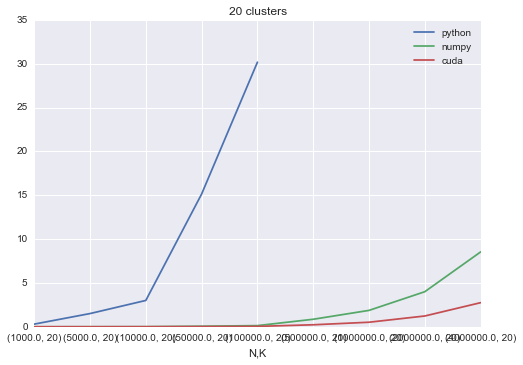

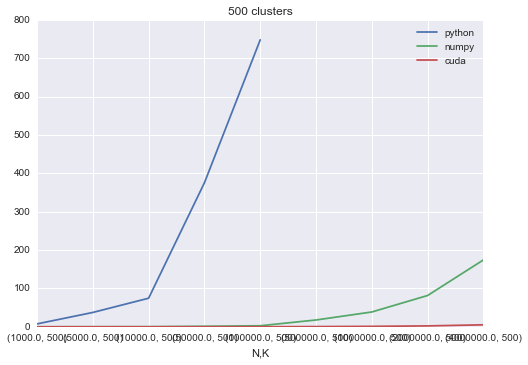

In [8]:
a=times.groupby(level='K')
#a.get_group(20)['python'].plot(subplots=True,layout=(2,2))
a.get_group(20)[['python','numpy','cuda']].plot(title="20 clusters")
a.get_group(500)[['python','numpy','cuda']].plot(title="500 clusters")

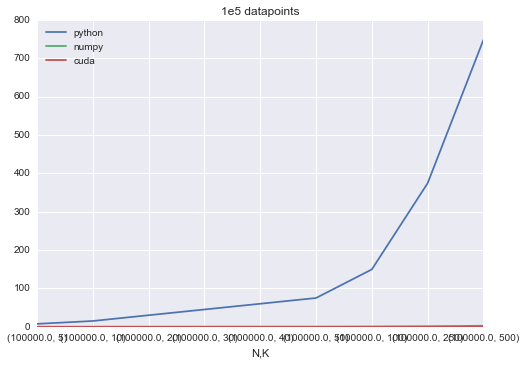

In [9]:
b=times.groupby(level='N')
b.get_group(1e5)[['python','numpy','cuda']].plot(title="1e5 datapoints")

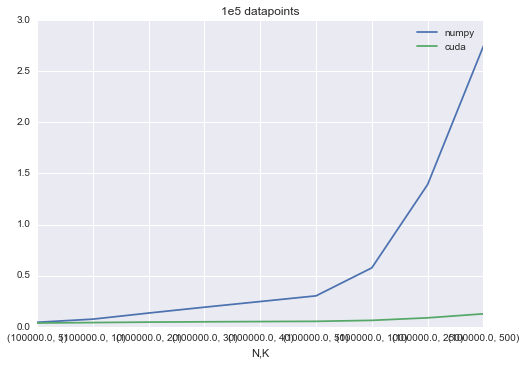

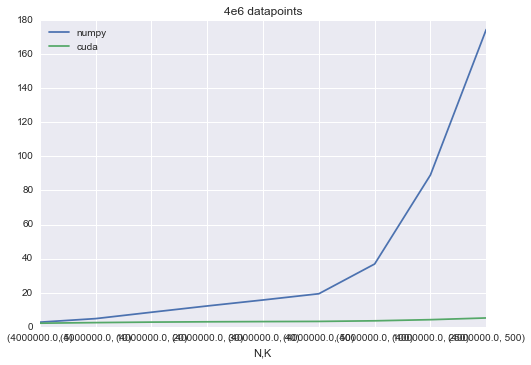

In [10]:
b.get_group(1e5)[['numpy','cuda']].plot(title="1e5 datapoints")
b.get_group(4e6)[['numpy','cuda']].plot(title="4e6 datapoints")

# Speedup over NumPy

In [11]:
s_cuda_np = results_mean.loc['numpy'] / results_mean.loc['cuda']
#s_cuda_np['speedup']=s_cuda_np['time']

In [12]:
s_cuda_np.groupby(level=['K']).describe()

time
K                   
5   count   9.000000
    mean    0.985723
    std     0.493390
    min     0.133275
    25%     0.554853
    50%     1.193400
    75%     1.358003
    max     1.457132
10  count   9.000000
    mean    1.519764
    std     0.746424
    min     0.220343
    25%     0.881492
    50%     1.805342
    75%     2.029723
    max     2.301137
20  count   9.000000
    mean    2.457008
    std     1.205152
    min     0.363343
    25%     1.439733
    50%     2.936084
    75%     3.247779
    max     3.732681
30  count   9.000000
    mean    3.289609
    std     1.628359
    min     0.480570
    25%     1.905275
    50%     3.921441
...              ...
50  std     2.434479
    min     0.675162
    25%     2.692707
    50%     5.661721
    75%     6.493815
    max     7.391884
100 count   9.000000
    mean    7.911281
    std     4.251455
    min     0.990879
    25%     4.079778
    50%     9.161985
    75%    11.096571
    max    12.349175
250 count   9.000000
    mean   14.457752
    std     8.629446
    min     1.473330
    25%     6.238538
    50%    15.870797
    75%    21.625960
    max    23.498493
500 count   9.000000
    mean   21.112413
    std    13.720313
    min     1.764032
    25%     7.725052
    50%    21.649511
    75%    33.633729
    max    34.824749

[72 rows x 1 columns]

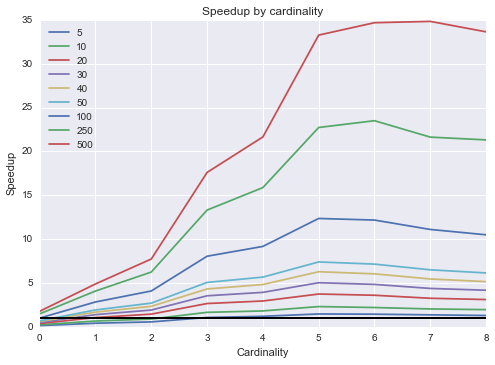

In [13]:
for key, grp in s_cuda_np.groupby(level=['K']):
    plt.plot(grp['time'],label=key)#grp.index.levels[0],
    
plt.legend(loc='best')
plt.title("Speedup by cardinality")
plt.plot([0, 8], [1, 1], 'k-', lw=2)
plt.ylabel("Speedup")
plt.xlabel("Cardinality")
#plt.xscale('log')
# axis method set_ticklabels to change tick labels

In [14]:
s_cuda_np.groupby(level=['N']).describe()

time
N                       
1000    count   9.000000
        mean    0.743579
        std     0.561571
        min     0.133275
        25%     0.363343
        50%     0.591274
        75%     0.990879
        max     1.764032
5000    count   9.000000
        mean    2.095040
        std     1.539764
        min     0.403063
        25%     1.050967
        50%     1.669032
        75%     2.826078
        max     4.881098
10000   count   9.000000
        mean    3.094017
        std     2.463365
        min     0.554853
        25%     1.439733
        50%     2.328727
        75%     4.079778
        max     7.725052
50000   count   9.000000
        mean    6.354337
        std     5.650573
        min     1.058298
        25%     2.647616
        50%     4.309250
...                  ...
500000  std    10.742637
        min     1.457132
        25%     3.732681
        50%     6.272841
        75%    12.349175
        max    33.260370
1000000 count   9.000000
        mean   10.618059
        std    11.282378
        min     1.431359
        25%     3.592037
        50%     6.034425
        75%    12.166647
        max    34.674198
2000000 count   9.000000
        mean   10.055049
        std    11.186559
        min     1.358003
        25%     3.247779
        50%     5.449410
        75%    11.096571
        max    34.824749
4000000 count   9.000000
        mean    9.690580
        std    10.878459
        min     1.282127
        25%     3.102835
        50%     5.146195
        75%    10.487440
        max    33.633729

[72 rows x 1 columns]

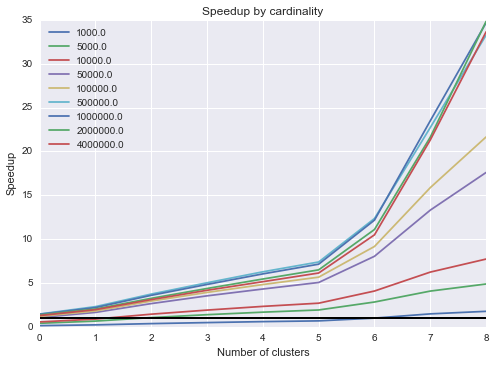

In [15]:
for key, grp in s_cuda_np.groupby(level=['N']):
    plt.plot(grp['time'],label=key)#grp.index.levels[0],
    
plt.plot([0, 8], [1, 1], 'k-', lw=2) #slowdown/speedup threshold
plt.legend(loc='best')

plt.title("Speedup by cardinality")
plt.ylabel("Speedup")
plt.xlabel("Number of clusters")

# Speedup over Python

In [16]:
s_cuda_py = results_mean.loc['python'] / results_mean.loc['cuda']

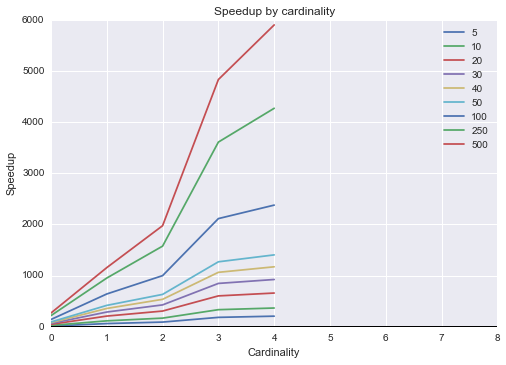

In [17]:
for key, grp in s_cuda_py.groupby(level=['K']):
    plt.plot(grp['time'],label=key)#grp.index.levels[0],
    
plt.plot([0, 8], [1, 1], 'k-', lw=2) #slowdown/speedup threshold
plt.legend(loc='best')

plt.title("Speedup by cardinality")
plt.ylabel("Speedup")
plt.xlabel("Cardinality")

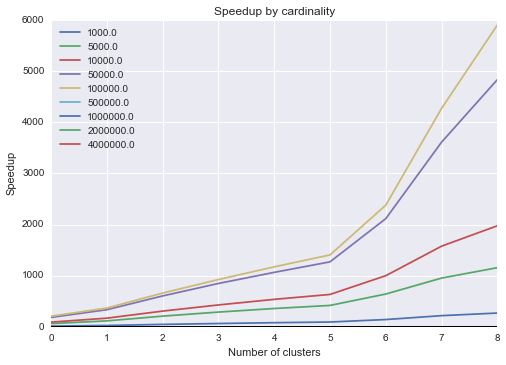

In [18]:
for key, grp in s_cuda_py.groupby(level=['N']):
    plt.plot(grp['time'],label=key)#grp.index.levels[0],
    
plt.plot([0, 8], [1, 1], 'k-', lw=2) #slowdown/speedup threshold
plt.legend(loc='best')

plt.title("Speedup by cardinality")
plt.ylabel("Speedup")
plt.xlabel("Number of clusters")

In [36]:
ax=matplotlib.axes.Axes(f)
type(ax)

TypeError: __init__() takes at least 3 arguments (2 given)